In [1]:
%%time
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4

CPU times: user 363 ms, sys: 97.1 ms, total: 461 ms
Wall time: 2.87 s


In [3]:
%%time
psi4.set_output_file('output.dat', False)


CPU times: user 1.17 ms, sys: 52 µs, total: 1.22 ms
Wall time: 889 µs


PosixPath('output.dat')

In [4]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 369 ms, sys: 47.2 ms, total: 417 ms
Wall time: 1.01 s


-76.0266327350902

In [5]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 275 ms, sys: 7.64 ms, total: 283 ms
Wall time: 284 ms


-38.92533462893707

In [7]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 824 ms, sys: 41 ms, total: 865 ms
Wall time: 1.43 s


-76.02703272937481

In [10]:
%%time
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)


CPU times: user 979 ms, sys: 43.7 ms, total: 1.02 s
Wall time: 1.36 s


In [11]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.11 ms, sys: 0 ns, total: 1.11 ms
Wall time: 1.11 ms


In [12]:
%%time
psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.66 s, sys: 200 ms, total: 3.86 s
Wall time: 4.16 s


-0.0022355823909805178

In [13]:
%%time
! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

/bin/bash: Example: command not found
CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.46 s, sys: 1.39 s, total: 6.84 s
Wall time: 12.9 s


In [14]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import psi4
from scipy.optimize import curve_fit



CPU times: user 303 ms, sys: 38.2 ms, total: 341 ms
Wall time: 3.49 s


In [15]:
def lj(r, sigma, epsilon):
    return 4 * epsilon * ( (sigma / r)**12 - (sigma / r)**6 )


In [18]:
%%time
# Define the geometry and calculate energy for each distance
for dist in distances:
    molecule = psi4.geometry(f"""
    Ar  0.0  0.0  0.0
    Ar  0.0  0.0  {dist}
    """)
    
    # Perform the calculation
    psi4.set_options({'basis': 'cc-pvdz'})
    energy = psi4.energy('scf')
    energies.append(energy)


CPU times: user 4.24 s, sys: 206 ms, total: 4.45 s
Wall time: 4.51 s


In [19]:
# Fit the energy data to the Lennard-Jones potential
params, covariance = curve_fit(lj, distances, energies)

# Extract the fitted parameters
sigma_fit, epsilon_fit = params
print(f"Fitted sigma: {sigma_fit}, Fitted epsilon: {epsilon_fit}")


Fitted sigma: 3.409697289552608, Fitted epsilon: 1594.1601942891946


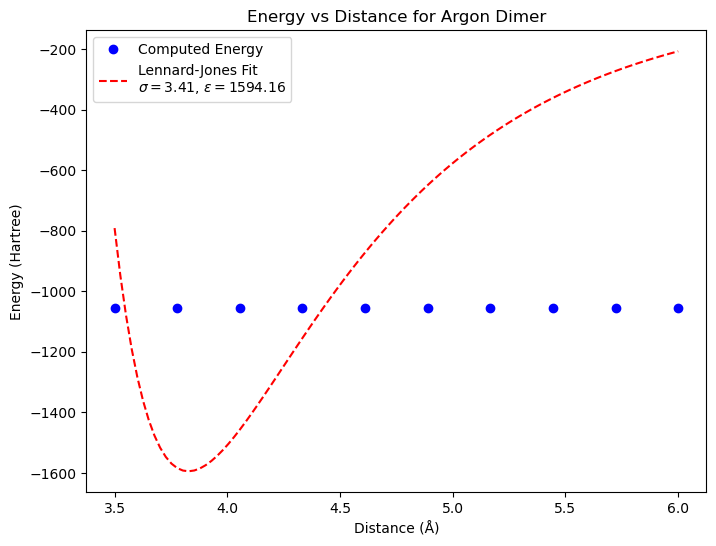

In [22]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot the computed energies (dots)
plt.plot(distances, energies, 'bo', label='Computed Energy')

# Plot the fitted Lennard-Jones potential (dashed line)
r_fit = np.linspace(3.5, 6.0, 100)
energy_fit = lj(r_fit, *params)
plt.plot(r_fit, energy_fit, 'r--', label=f'Lennard-Jones Fit\n$\sigma={sigma_fit:.2f}$, $\epsilon={epsilon_fit:.2f}$')

# Customize plot
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy vs Distance for Argon Dimer')
plt.legend()

# Save the figure
plt.savefig('argon_energy_vs_distance.png')

# Show the plot
plt.show()


In [23]:
print(energies)


[-1053.5988710417594, -1053.5995007864956, -1053.5996977594673, -1053.599743469443, -1053.5997458577256, -1053.5997413183636, -1053.5997383319673, -1053.5997371219514, -1053.5997367450627, -1053.5997366469767]


In [24]:
# Conversion from Hartree to kcal/mol
hartree_to_kcalmol = 627.509

# After calculating the energy, convert to kcal/mol
energies_kcalmol = [energy * hartree_to_kcalmol for energy in energies]


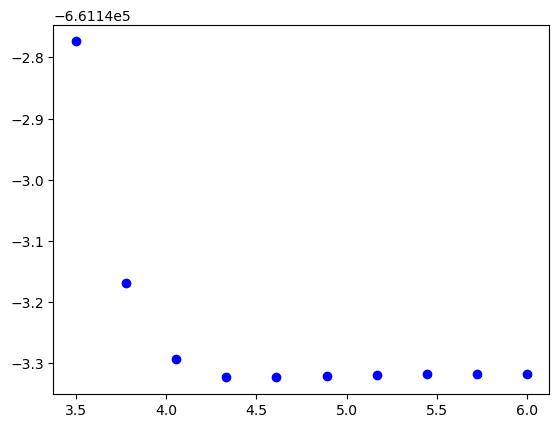

In [25]:
plt.plot(distances, energies_kcalmol, 'bo', label='Computed Energy (kcal/mol)')


In [36]:
import sys
print(sys.argv)
import time

['/ext3/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py', '-f', '/home/ap8064/.local/share/jupyter/runtime/kernel-7223f755-7055-42f0-aaf7-076b6836990b.json']


455 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
454 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitted sigma: 3.4096972893235993, Fitted epsilon: 1000349.8680464337


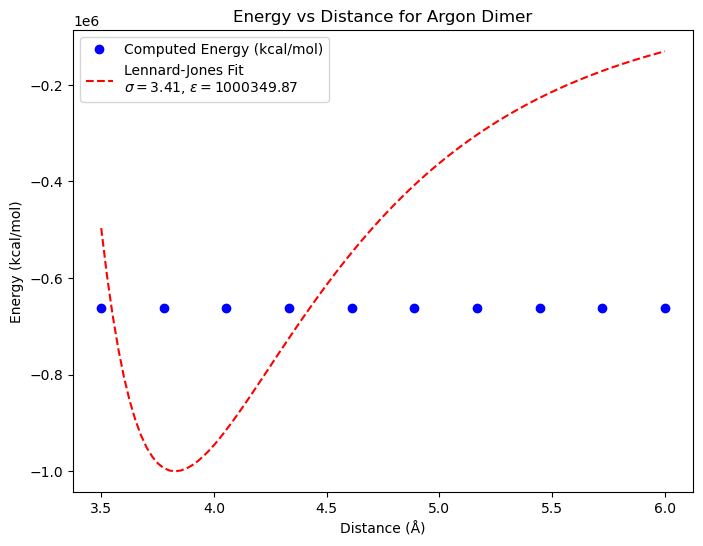

In [41]:
%timeit psi4.energy('scf')

import numpy as np
import matplotlib.pyplot as plt
import psi4
from scipy.optimize import curve_fit

# Lennard-Jones potential function
def lj(r, sigma, epsilon):
    return 4 * epsilon * ( (sigma / r)**12 - (sigma / r)**6 )

# Timing the energy calculation loop
%timeit psi4.energy('scf')

# Define distances and list to store energies
distances = np.linspace(3.5, 6.0, 10)
energies = []

# Calculate energy for each distance
for dist in distances:
    molecule = psi4.geometry(f"""
    Ar  0.0  0.0  0.0
    Ar  0.0  0.0  {dist}
    """)
    
    # Perform the calculation
    psi4.set_options({'basis': 'cc-pvdz'})
    energy = psi4.energy('scf')
    energies.append(energy)

# Convert energies to kcal/mol for better visualization
energies_kcalmol = [energy * 627.509 for energy in energies]

# Fit the energy data to the Lennard-Jones potential
params, covariance = curve_fit(lj, distances, energies_kcalmol)

# Extract fitted parameters
sigma_fit, epsilon_fit = params
print(f"Fitted sigma: {sigma_fit}, Fitted epsilon: {epsilon_fit}")

# Plot the computed energies and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(distances, energies_kcalmol, 'bo', label='Computed Energy (kcal/mol)')
r_fit = np.linspace(3.5, 6.0, 100)
energy_fit = lj(r_fit, *params)
plt.plot(r_fit, energy_fit, 'r--', label=f'Lennard-Jones Fit\n$\sigma={sigma_fit:.2f}$, $\epsilon={epsilon_fit:.2f}$')

# Customize the plot
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.title('Energy vs Distance for Argon Dimer')
plt.legend()

# Save the figure
plt.savefig('argon_energy_vs_distance.png')

# Show the plot
plt.show()


In [39]:
%%time
a = sum(range(100000))
%timeit psi4.energy('scf')


455 ms ± 7.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CPU times: user 3.3 s, sys: 308 ms, total: 3.61 s
Wall time: 3.66 s
